In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
import pandas as pd
import os
import cv2

In [3]:
model = YOLO('yolov8n-obb.yaml').load('yolov8n.pt')

Transferred 355/397 items from pretrained weights


# 01. TRAINING

### model trained resume

In [9]:
model_train = YOLO('Synapses-Model/training/weights/last.pt')

In [10]:
result = model_train.train(
    data='../dataset/data.yaml',
    epochs=500,
    patience=100,
    imgsz=256,
    cache=True,
    device=0,
    workers=0,
    project="Synapses-Model",
    name="training",
    exist_ok=True,
    plots=True,
    resume=True
)

New https://pypi.org/project/ultralytics/8.2.14 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.12  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=obb, mode=train, model=Synapses-Model\training\weights\last.pt, data=../dataset/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=True, device=0, workers=0, project=Synapses-Model, name=training, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=Synapses-Model\training\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 

train: Scanning D:\CHALLENGES\synapsis-pdm\src\synapsis\model\dataset\train\labels.cache... 2001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2001/2001 [00:00<?, ?it/s]
train: Caching images (0.4GB RAM): 100%|██████████| 2001/2001 [00:02<00:00, 893.02it/s]
val: Scanning D:\CHALLENGES\synapsis-pdm\src\synapsis\model\dataset\valid\labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
val: Caching images (0.0GB RAM): 100%|██████████| 261/261 [00:00<00:00, 1238.61it/s]

Plotting labels to Synapses-Model\training\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Resuming training Synapses-Model\training\weights\last.pt from epoch 161 to 500 total epochs
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to Synapses-Model\training
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500       1.1G     0.4578     0.2989      2.177          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]

                   all        261        261      0.967      0.992      0.994      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      0.94G     0.4596      0.306      2.136          3        256: 100%|██████████| 126/126 [00:26<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.95it/s]

                   all        261        261      0.975      0.987       0.98      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      0.94G      0.461     0.3138       2.15          2        256: 100%|██████████| 126/126 [00:26<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.73it/s]

                   all        261        261      0.961      0.994      0.983      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      0.94G     0.4648     0.3065      2.144          3        256: 100%|██████████| 126/126 [00:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]

                   all        261        261       0.98      0.983      0.983      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      0.94G     0.4612     0.3072      2.168          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.24it/s]

                   all        261        261      0.972      0.989      0.987       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      0.94G     0.4632     0.3099      2.149          4        256: 100%|██████████| 126/126 [00:27<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.94it/s]

                   all        261        261      0.985      0.989      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      0.94G     0.4504     0.3028      2.129          2        256: 100%|██████████| 126/126 [00:29<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.35it/s]

                   all        261        261      0.977      0.988      0.989      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      0.94G     0.4579     0.2989      2.135          2        256: 100%|██████████| 126/126 [00:27<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.02it/s]

                   all        261        261      0.981      0.987      0.989      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      0.94G     0.4459      0.288      2.152          1        256: 100%|██████████| 126/126 [00:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]

                   all        261        261       0.97      0.987      0.976      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      0.94G     0.4575     0.2997      2.156          1        256: 100%|██████████| 126/126 [00:28<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.68it/s]

                   all        261        261      0.964      0.978      0.966      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      0.94G     0.4469     0.2984      2.152          2        256: 100%|██████████| 126/126 [00:27<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.90it/s]

                   all        261        261      0.964      0.978      0.967      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      0.94G     0.4605      0.315      2.193          4        256: 100%|██████████| 126/126 [00:29<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.77it/s]

                   all        261        261      0.964      0.989      0.971      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      0.94G     0.4763     0.3142       2.16          2        256: 100%|██████████| 126/126 [00:27<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]

                   all        261        261       0.97      0.978      0.979      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      0.94G     0.4577     0.3063      2.149          2        256: 100%|██████████| 126/126 [00:27<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]

                   all        261        261      0.977      0.983      0.978      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      0.94G     0.4642     0.3158      2.174          4        256: 100%|██████████| 126/126 [00:30<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        261        261      0.983      0.987      0.979      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      0.94G      0.462     0.3112      2.143          3        256: 100%|██████████| 126/126 [00:27<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]

                   all        261        261      0.982      0.988       0.98      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      0.94G     0.4642     0.2997      2.153          2        256: 100%|██████████| 126/126 [00:27<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]

                   all        261        261      0.978      0.982      0.977      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      0.94G     0.4585     0.3003      2.178          3        256: 100%|██████████| 126/126 [00:26<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.21it/s]

                   all        261        261      0.969      0.976      0.969      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      0.94G     0.4655     0.3112        2.2          1        256: 100%|██████████| 126/126 [00:26<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.80it/s]

                   all        261        261      0.975      0.975      0.976      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      0.94G     0.4592     0.3061      2.163          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        261        261      0.962      0.993       0.99      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      0.94G     0.4556     0.3058       2.15          2        256: 100%|██████████| 126/126 [00:27<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.68it/s]

                   all        261        261      0.985      0.973      0.988      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      0.94G     0.4639     0.3087      2.168          2        256: 100%|██████████| 126/126 [00:26<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.63it/s]

                   all        261        261      0.969      0.988      0.985      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      0.94G     0.4557     0.3023      2.153          4        256: 100%|██████████| 126/126 [00:27<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.43it/s]

                   all        261        261      0.972      0.985      0.974      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      0.94G     0.4591     0.3081      2.169          1        256: 100%|██████████| 126/126 [00:27<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.57it/s]

                   all        261        261      0.971      0.983      0.982      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      0.94G     0.4631     0.3038      2.177          1        256: 100%|██████████| 126/126 [00:26<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.93it/s]

                   all        261        261      0.973      0.977      0.986      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      0.94G     0.4544     0.3005      2.147          2        256: 100%|██████████| 126/126 [00:25<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]

                   all        261        261      0.955      0.984      0.968      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      0.94G      0.473     0.3122      2.186          1        256: 100%|██████████| 126/126 [00:24<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.39it/s]

                   all        261        261      0.981      0.991      0.986      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      0.94G     0.4498     0.2986      2.143          2        256: 100%|██████████| 126/126 [00:26<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]

                   all        261        261      0.976      0.993       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      0.94G     0.4702     0.3202      2.164          2        256: 100%|██████████| 126/126 [00:25<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.27it/s]

                   all        261        261      0.967      0.988      0.984      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      0.94G     0.4443     0.2984      2.147          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.33it/s]

                   all        261        261      0.972      0.976      0.972      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      0.94G     0.4537      0.304      2.151          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.43it/s]

                   all        261        261      0.979       0.98      0.981       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      0.94G     0.4478     0.2941      2.155          1        256: 100%|██████████| 126/126 [00:25<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.51it/s]

                   all        261        261      0.974      0.984      0.979      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      0.94G     0.4483     0.2945      2.127          1        256: 100%|██████████| 126/126 [00:28<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.40it/s]

                   all        261        261      0.972      0.985      0.982      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      0.94G     0.4502     0.2992      2.165          2        256: 100%|██████████| 126/126 [00:26<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.75it/s]

                   all        261        261      0.962      0.988      0.982      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      0.94G     0.4442     0.2995       2.15          2        256: 100%|██████████| 126/126 [00:24<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        261        261      0.969      0.982      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      0.94G     0.4503     0.2916      2.136          2        256: 100%|██████████| 126/126 [00:25<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.62it/s]

                   all        261        261      0.979      0.989      0.992      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      0.94G     0.4407     0.2859      2.144          2        256: 100%|██████████| 126/126 [00:25<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]

                   all        261        261      0.975      0.982      0.979      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      0.94G     0.4432     0.2889      2.139          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.34it/s]

                   all        261        261      0.977      0.989       0.98      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      0.94G     0.4431     0.2992      2.167          1        256: 100%|██████████| 126/126 [00:25<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.34it/s]

                   all        261        261      0.979      0.981       0.98      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      0.94G     0.4455     0.3016      2.129          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.27it/s]

                   all        261        261      0.971      0.996      0.987      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      0.94G     0.4377     0.2912      2.143          3        256: 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.28it/s]

                   all        261        261       0.98       0.99       0.99      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      0.94G     0.4404     0.2895      2.153          2        256: 100%|██████████| 126/126 [00:25<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.43it/s]

                   all        261        261      0.987      0.989      0.989      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      0.94G     0.4492     0.3042      2.145          2        256: 100%|██████████| 126/126 [00:25<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.30it/s]

                   all        261        261      0.986      0.981      0.984      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      0.94G     0.4398     0.2859      2.146          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.40it/s]

                   all        261        261      0.979      0.978      0.982      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      0.94G     0.4347     0.2866      2.145          4        256: 100%|██████████| 126/126 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.28it/s]

                   all        261        261      0.978      0.984      0.978       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      0.94G     0.4422     0.2957      2.153          1        256: 100%|██████████| 126/126 [00:25<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.29it/s]

                   all        261        261      0.978      0.981      0.981      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      0.94G     0.4529     0.3072       2.15          1        256: 100%|██████████| 126/126 [00:25<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.12it/s]

                   all        261        261      0.977      0.987       0.98      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      0.94G     0.4453     0.2878      2.146          1        256: 100%|██████████| 126/126 [00:24<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.07it/s]

                   all        261        261      0.976      0.996       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      0.94G     0.4444     0.2932      2.175          1        256: 100%|██████████| 126/126 [00:25<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.89it/s]

                   all        261        261      0.976      0.993      0.983      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      0.94G     0.4432      0.296      2.154          3        256: 100%|██████████| 126/126 [00:24<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.85it/s]

                   all        261        261      0.978      0.985      0.979      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      0.94G     0.4492     0.3006      2.152          3        256: 100%|██████████| 126/126 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261      0.978      0.986      0.981      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      0.94G     0.4469     0.2937      2.118          4        256: 100%|██████████| 126/126 [00:23<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261      0.985      0.988      0.993      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      0.94G     0.4467     0.2939      2.141          3        256: 100%|██████████| 126/126 [00:23<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]

                   all        261        261      0.988      0.978      0.992      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      0.94G     0.4543     0.3023      2.144          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.06it/s]

                   all        261        261      0.982      0.985       0.98      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      0.94G     0.4509     0.3001      2.173          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        261        261      0.967      0.982      0.984      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      0.94G     0.4424     0.2928      2.141          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261      0.979      0.987      0.987      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      0.94G      0.449     0.2947      2.148          1        256: 100%|██████████| 126/126 [00:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.01it/s]

                   all        261        261      0.972       0.99      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      0.94G     0.4398     0.2915      2.134          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.975       0.99       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      0.94G     0.4424     0.2898      2.115          4        256: 100%|██████████| 126/126 [00:23<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        261        261      0.981      0.991      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      0.94G      0.439     0.2936      2.137          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261      0.976      0.991      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      0.94G     0.4361     0.2965      2.131          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261      0.981       0.99      0.985      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      0.94G     0.4431     0.3027      2.184          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.979      0.986       0.98      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      0.94G     0.4413      0.286      2.148          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261      0.979      0.982      0.984       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      0.94G     0.4333      0.291      2.118          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261       0.98      0.986      0.986      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      0.94G     0.4425     0.2905      2.146          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        261        261       0.98       0.99       0.99       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      0.94G      0.432      0.289      2.137          0        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        261        261      0.985      0.994      0.989      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      0.94G      0.432     0.2829      2.129          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.986      0.988      0.991      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      0.94G     0.4316     0.2868      2.155          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.973      0.994      0.991      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      0.94G     0.4385     0.2894      2.132          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.10it/s]

                   all        261        261      0.976       0.99      0.989      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      0.94G     0.4493     0.2962      2.162          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261      0.965      0.997      0.985      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      0.94G     0.4394     0.2883      2.162          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261      0.972      0.987      0.982      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      0.94G     0.4364     0.3019       2.13          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261      0.972      0.988       0.98       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      0.94G     0.4396     0.2864      2.149          1        256: 100%|██████████| 126/126 [00:23<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        261        261      0.977      0.984       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      0.94G     0.4321     0.2921      2.123          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.29it/s]

                   all        261        261      0.976      0.986      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      0.94G     0.4378     0.2878      2.138          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        261        261      0.969      0.984      0.974      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      0.94G     0.4424     0.2891      2.178          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.91it/s]

                   all        261        261      0.969      0.981       0.97      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      0.94G     0.4272     0.2903      2.121          2        256: 100%|██████████| 126/126 [00:23<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        261        261       0.97      0.984      0.972      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      0.94G     0.4412        0.3      2.169          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.05it/s]

                   all        261        261      0.972      0.985      0.977      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      0.94G     0.4327     0.2819      2.146          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261       0.97      0.988      0.975       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      0.94G     0.4273     0.2843      2.164          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261      0.969      0.987      0.975      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      0.94G      0.425     0.2893      2.148          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        261        261      0.975      0.987      0.987      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      0.94G     0.4189     0.2823      2.137          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        261        261      0.978      0.986      0.987      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      0.94G     0.4292     0.2845      2.115          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        261        261      0.967      0.996      0.979      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      0.94G     0.4242     0.2867       2.13          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261      0.965      0.995      0.974       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      0.94G      0.429      0.278      2.139          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        261        261      0.973      0.984      0.976       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      0.94G     0.4256     0.2758      2.137          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.975      0.982      0.977      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      0.94G     0.4394     0.2915      2.122          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.979      0.986      0.986      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      0.94G     0.4294     0.2778       2.13          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.973      0.988      0.986      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      0.94G     0.4218     0.2834      2.137          2        256: 100%|██████████| 126/126 [00:23<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

                   all        261        261      0.972      0.987      0.976      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      0.94G     0.4275     0.2869      2.118          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        261        261      0.971       0.99      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      0.94G     0.4108     0.2761      2.127          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.28it/s]

                   all        261        261      0.981      0.989      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      0.94G     0.4267      0.285      2.137          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261      0.982      0.991      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      0.94G     0.4224     0.2823      2.139          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.984      0.991      0.993      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      0.94G     0.4271     0.2829      2.132          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        261        261      0.971      0.994      0.993      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      0.94G       0.42     0.2781      2.122          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261      0.979      0.989      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      0.94G     0.4326     0.2868       2.16          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.24it/s]

                   all        261        261      0.984      0.991       0.99       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      0.94G     0.4213     0.2778      2.127          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        261        261      0.984      0.991      0.991      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      0.94G      0.409     0.2789      2.117          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        261        261      0.983      0.991      0.992      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      0.94G     0.4201      0.281      2.095          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.983      0.991      0.989      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      0.94G     0.4209     0.2776       2.14          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.979      0.996      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      0.94G     0.4258     0.2755      2.137          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        261        261      0.985       0.99      0.991      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      0.94G     0.4181     0.2754       2.13          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.985      0.987       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      0.94G     0.4205     0.2777      2.117          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]

                   all        261        261      0.973      0.983      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      0.94G      0.418     0.2763      2.124          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.976      0.988      0.985      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      0.94G     0.4228     0.2744      2.148          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        261        261       0.98      0.984       0.98      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      0.94G     0.4231     0.2871      2.122          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        261        261      0.979      0.983      0.977       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      0.94G     0.4166     0.2743      2.119          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]

                   all        261        261      0.981      0.985      0.978      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      0.94G     0.4277      0.282      2.146          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.968       0.99      0.978      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      0.94G     0.4132     0.2745      2.126          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261       0.97      0.991       0.98      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      0.94G     0.4081      0.275      2.116          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.973      0.991      0.979      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      0.94G     0.4216     0.2778      2.116          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.975      0.984      0.979      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      0.94G     0.4176      0.277      2.125          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.07it/s]

                   all        261        261      0.975      0.988      0.982      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      0.94G     0.3991     0.2654      2.122          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.973      0.986      0.978      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      0.94G     0.4261     0.2849      2.126          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.04it/s]

                   all        261        261      0.965      0.993      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      0.94G     0.4149     0.2741      2.123          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.24it/s]

                   all        261        261      0.978      0.993      0.991      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      0.94G      0.416     0.2765      2.138          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261       0.97      0.998      0.991      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      0.94G     0.4125     0.2745      2.122          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261      0.964      0.993      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      0.94G       0.41     0.2698      2.129          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        261        261      0.968      0.985       0.98      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      0.94G     0.4164     0.2782      2.116          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.972      0.986      0.981      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      0.94G     0.4072     0.2741      2.126          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]

                   all        261        261       0.97      0.991       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      0.94G     0.4122     0.2721      2.105          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        261        261      0.975      0.987      0.983      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      0.94G     0.4239     0.2744      2.142          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261       0.97      0.994      0.983      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      0.94G     0.4079     0.2664      2.131          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        261        261      0.969       0.99      0.974      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      0.94G     0.4066     0.2642      2.108          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        261        261      0.973      0.987      0.975      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      0.94G     0.4111     0.2702      2.114          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.973       0.99      0.976      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      0.94G     0.4079     0.2668      2.126          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.33it/s]

                   all        261        261      0.972      0.987      0.975      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      0.94G     0.4126     0.2728      2.126          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.973      0.987      0.974      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      0.94G     0.4055     0.2725      2.109          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.27it/s]

                   all        261        261      0.973      0.987      0.974      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      0.94G     0.4158     0.2711      2.123          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261       0.97      0.991      0.975      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      0.94G     0.4115      0.272       2.12          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        261        261       0.97      0.993      0.979      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      0.94G     0.4184     0.2745      2.142          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.13it/s]

                   all        261        261       0.97      0.994      0.984      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      0.94G     0.4156     0.2689      2.124          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        261        261      0.969      0.991      0.983      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      0.94G     0.4085     0.2653       2.12          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.971      0.997      0.984      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      0.94G     0.4015     0.2631      2.094          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.05it/s]

                   all        261        261      0.974      0.988      0.982      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      0.94G      0.422     0.2769      2.134          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261      0.976      0.987      0.979       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      0.94G     0.4131     0.2725       2.11          4        256: 100%|██████████| 126/126 [00:23<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.24it/s]

                   all        261        261      0.975      0.988      0.981       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      0.94G     0.4052     0.2684      2.118          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        261        261      0.968      0.993      0.981      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      0.94G     0.4075     0.2717      2.117          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]

                   all        261        261       0.98       0.99      0.988      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      0.94G     0.4011     0.2662      2.114          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.29it/s]

                   all        261        261      0.976      0.986      0.989      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      0.94G     0.4152     0.2727      2.143          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.17it/s]

                   all        261        261      0.979      0.985      0.988      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      0.94G     0.4082     0.2714      2.148          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.976      0.985      0.986      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      0.94G     0.4085     0.2759      2.138          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.976      0.985      0.985      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      0.94G     0.4052     0.2709      2.132          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.974      0.987      0.982      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      0.94G     0.4054      0.269      2.092          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.972      0.991      0.982      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      0.94G     0.4019     0.2665      2.134          1        256: 100%|██████████| 126/126 [00:23<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.977       0.99      0.982      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      0.94G     0.4049     0.2691      2.103          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.978       0.99      0.984      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      0.94G     0.4055     0.2685      2.118          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.99it/s]

                   all        261        261      0.983      0.988      0.984      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      0.94G      0.404     0.2622      2.108          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261       0.98      0.988      0.982      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      0.94G     0.4093     0.2673      2.129          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.20it/s]

                   all        261        261      0.973      0.987      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      0.94G     0.3955     0.2605      2.108          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        261        261      0.975      0.985      0.978      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      0.94G     0.4102      0.271      2.125          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.975      0.985      0.977      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      0.94G     0.4025     0.2647      2.095          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.974      0.985       0.98       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      0.94G     0.4102     0.2669      2.129          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.971      0.987      0.979      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      0.94G     0.4088     0.2665      2.147          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.971      0.985      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      0.94G      0.398     0.2696      2.105          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]

                   all        261        261      0.972      0.983      0.977      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      0.94G     0.4041      0.267      2.116          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        261        261      0.972      0.984      0.976      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      0.94G     0.4017     0.2648      2.125          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.31it/s]

                   all        261        261      0.968      0.988      0.978      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      0.94G      0.399     0.2621      2.105          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.969      0.989      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      0.94G     0.4132     0.2756      2.106          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.30it/s]

                   all        261        261      0.971      0.984      0.976      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      0.94G     0.4049     0.2679      2.135          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.971      0.988      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      0.94G     0.4078     0.2668      2.119          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.19it/s]

                   all        261        261      0.967      0.988      0.975      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      0.94G     0.3996     0.2799      2.112          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.10it/s]

                   all        261        261      0.965      0.988      0.975      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      0.94G     0.4013      0.267      2.101          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.03it/s]

                   all        261        261      0.967      0.988      0.972      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      0.94G     0.4001     0.2693      2.125          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261      0.966      0.987      0.972      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      0.94G     0.4012     0.2661       2.11          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        261        261      0.962       0.99      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      0.94G     0.4042     0.2613      2.109          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.99it/s]

                   all        261        261      0.965      0.991      0.974      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      0.94G     0.4018     0.2761      2.108          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        261        261      0.973      0.985      0.976      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      0.94G     0.3958     0.2623      2.118          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.12it/s]

                   all        261        261      0.974      0.983      0.979      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      0.94G     0.3995     0.2653      2.098          0        256: 100%|██████████| 126/126 [00:22<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.04it/s]

                   all        261        261      0.966      0.993      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      0.94G     0.3934     0.2602      2.121          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]

                   all        261        261      0.972      0.986      0.982      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      0.94G     0.4026     0.2622      2.104          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.32it/s]

                   all        261        261      0.966      0.991      0.977      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      0.94G      0.396     0.2609      2.111          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.21it/s]

                   all        261        261      0.966      0.991      0.976      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      0.94G     0.3925     0.2583      2.131          2        256: 100%|██████████| 126/126 [00:23<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]

                   all        261        261      0.961      0.995      0.975      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      0.94G     0.4118     0.2679      2.145          1        256: 100%|██████████| 126/126 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.81it/s]

                   all        261        261      0.967      0.991      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      0.94G     0.3838      0.258      2.088          1        256: 100%|██████████| 126/126 [00:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.95it/s]

                   all        261        261      0.967      0.991      0.979      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      0.94G     0.3904      0.258      2.122          1        256: 100%|██████████| 126/126 [00:23<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.81it/s]

                   all        261        261      0.965      0.994      0.981      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      0.94G     0.3873     0.2555      2.078          2        256: 100%|██████████| 126/126 [00:23<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.57it/s]

                   all        261        261       0.97       0.99      0.979      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      0.94G     0.3976      0.272      2.132          2        256: 100%|██████████| 126/126 [00:26<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.29it/s]

                   all        261        261       0.97      0.991      0.975      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500      0.94G     0.4004     0.2632      2.116          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261      0.969      0.992      0.975      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500      0.94G     0.3969     0.2623      2.124          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        261        261      0.969      0.992      0.976       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500      0.94G     0.3953     0.2647      2.104          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.06it/s]

                   all        261        261      0.971      0.988      0.977      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      0.94G     0.4034     0.2686      2.123          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        261        261      0.971      0.987      0.977      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500      0.94G     0.3943      0.259      2.092          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.29it/s]

                   all        261        261      0.971      0.987      0.976      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      0.94G     0.3839     0.2536      2.091          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        261        261      0.968      0.993      0.977      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      0.94G     0.3961     0.2634       2.11          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.24it/s]

                   all        261        261      0.969      0.995      0.977      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      0.94G     0.3835     0.2586       2.09          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.32it/s]

                   all        261        261       0.97      0.993      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500      0.94G     0.3919     0.2578      2.138          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]

                   all        261        261       0.97      0.994      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500      0.94G     0.3986     0.2599      2.114          4        256: 100%|██████████| 126/126 [00:23<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.11it/s]

                   all        261        261      0.971      0.994      0.982      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      0.94G     0.3827     0.2586      2.088          3        256: 100%|██████████| 126/126 [00:22<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.18it/s]

                   all        261        261      0.972      0.994      0.983       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500      0.94G     0.3888     0.2666      2.109          2        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.972      0.994      0.986      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500      0.94G     0.3895     0.2591      2.093          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        261        261      0.972      0.994      0.986       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      0.94G     0.3885     0.2675       2.08          0        256: 100%|██████████| 126/126 [00:22<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        261        261      0.969      0.996       0.98      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500      0.94G      0.405     0.3035      2.108          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.25it/s]

                   all        261        261      0.969      0.996       0.98      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500      0.94G     0.3863     0.2552      2.079          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.14it/s]

                   all        261        261       0.97      0.994      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      0.94G     0.3957     0.2587      2.118          4        256: 100%|██████████| 126/126 [00:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        261        261       0.97      0.994      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      0.94G     0.3847     0.2509      2.095          1        256: 100%|██████████| 126/126 [00:22<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        261        261       0.97      0.994      0.979      0.849
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 256, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



196 epochs completed in 1.510 hours.
Optimizer stripped from Synapses-Model\training\weights\last.pt, 6.4MB
Optimizer stripped from Synapses-Model\training\weights\best.pt, 6.4MB

Validating Synapses-Model\training\weights\best.pt...
Ultralytics YOLOv8.2.12  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077609 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.11it/s]


                   all        261        261      0.984      0.991       0.99      0.861
               fatigue        261        162      0.998      0.981      0.995      0.838
                normal        261         99      0.971          1      0.985      0.884
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to Synapses-Model\training


### Confusion Matrix

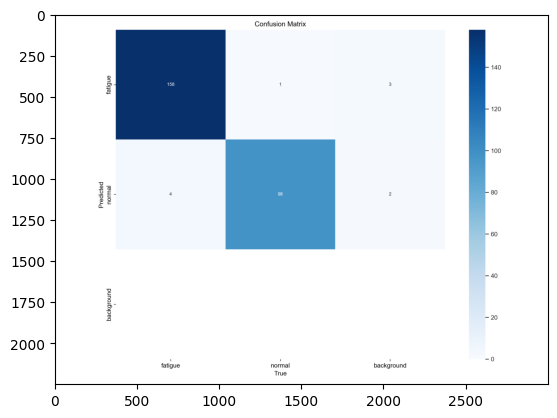

In [2]:
cf_matrix = plt.imread('./Synapses-Model/training/confusion_matrix.png')
plt.imshow(cf_matrix)

### PR Curve

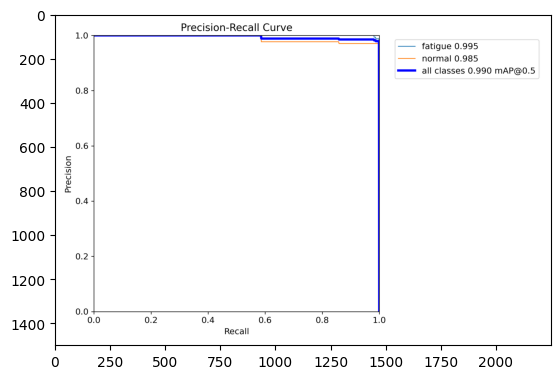

In [5]:
pr_curve = plt.imread('./Synapses-Model/training/PR_curve.png')
plt.imshow(pr_curve)

### F1 Curve

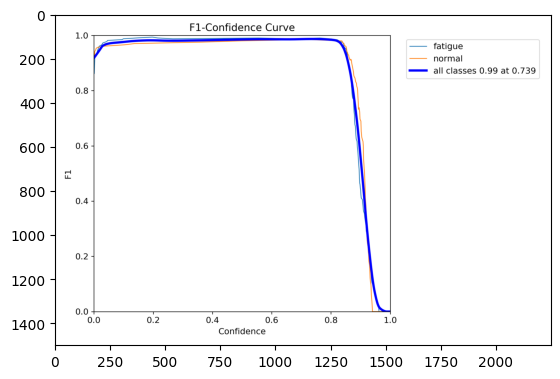

In [6]:
f1_curve = plt.imread('./Synapses-Model/training/F1_curve.png')
plt.imshow(f1_curve)

# 02. VALIDATION

In [7]:
model_trained = YOLO("Synapses-Model/training/weights/best.pt")

In [8]:
metrics = model_trained.val(
    data="../dataset/data.yaml",
    project="Synapses-Model",
    name="validation",
    exist_ok=True
)

Ultralytics YOLOv8.2.12  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077609 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning D:\CHALLENGES\synapsis-pdm\src\synapsis\model\dataset\valid\labels.cache... 261 images, 0 backgrounds, 0 corrupt: 100%|██████████| 261/261 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]


                   all        261        261      0.984      0.991       0.99      0.861
               fatigue        261        162      0.998      0.981      0.995      0.839
                normal        261         99      0.971          1      0.985      0.884
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to Synapses-Model\validation


### Confusion Matrix

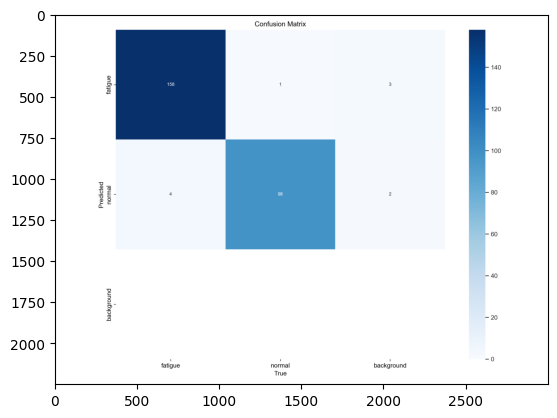

In [9]:
cf_matrix = plt.imread('./Synapses-Model/validation/confusion_matrix.png')
plt.imshow(cf_matrix)

### PR Curve

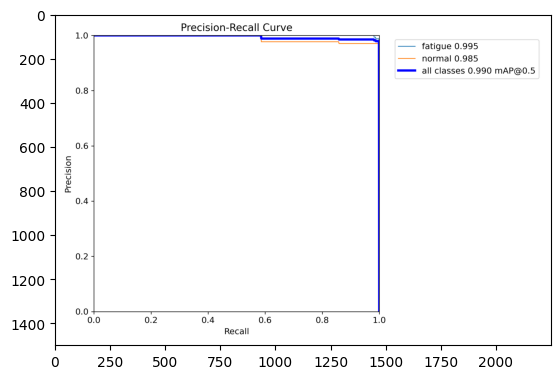

In [10]:
pr_curve = plt.imread('./Synapses-Model/validation/PR_curve.png')
plt.imshow(pr_curve)

### F1 Curve

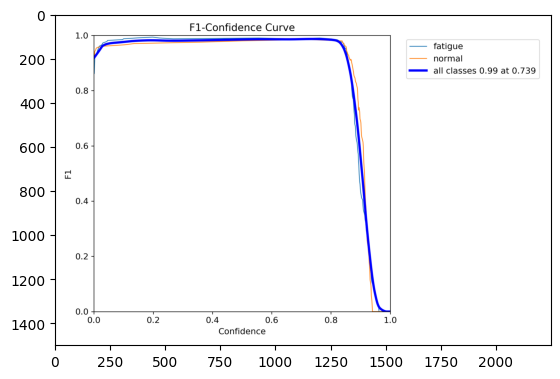

In [11]:
f1_curve = plt.imread('./Synapses-Model/validation/F1_curve.png')
plt.imshow(f1_curve)

### Prediction Sample

Text(0.5, 1.0, 'Prediction 2')

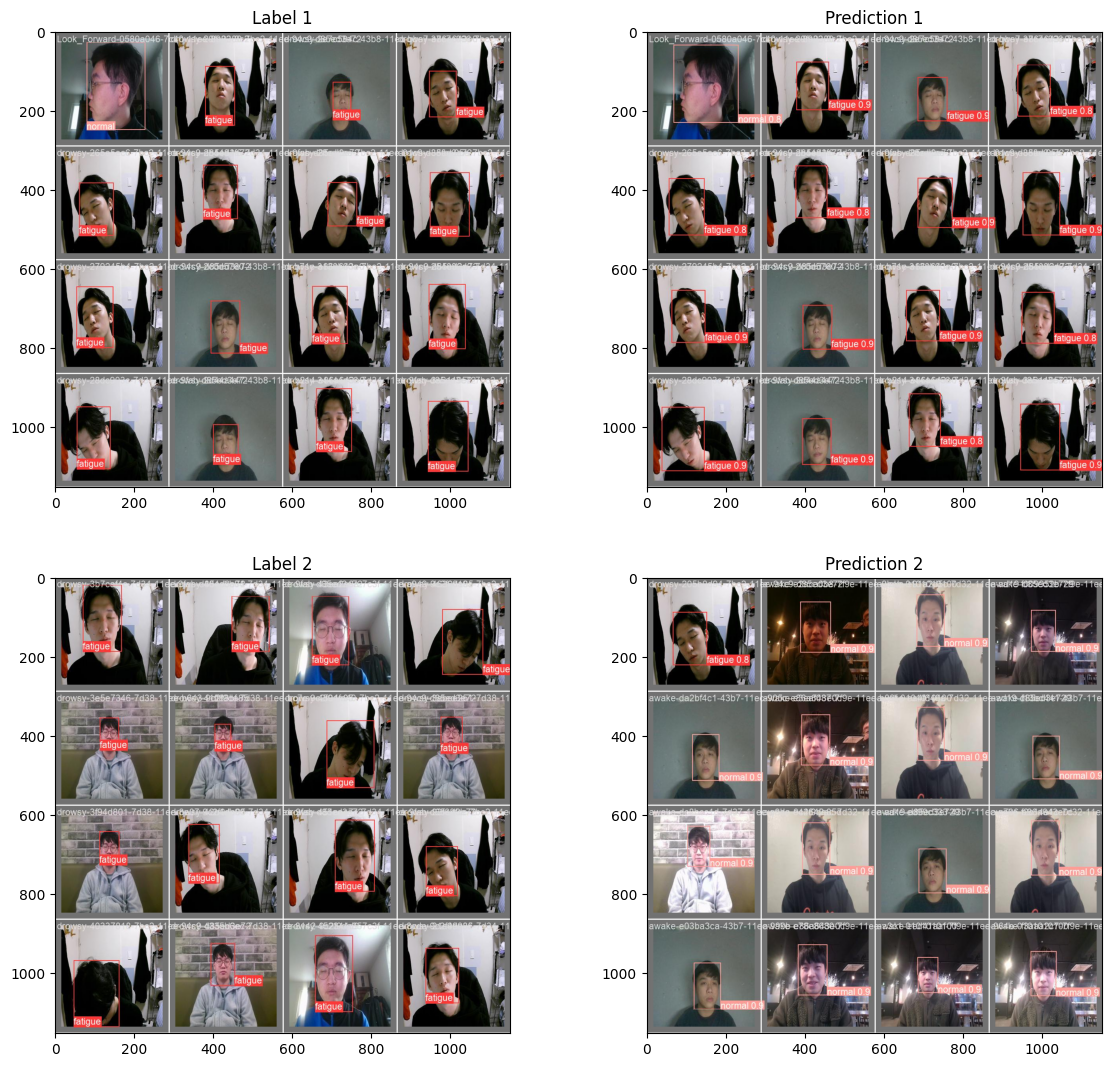

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 13))

val_label1 = plt.imread('./Synapses-Model/validation/val_batch0_labels.jpg')
ax1.imshow(val_label1)
ax1.set_title("Label 1")

val_pred1 = plt.imread('./Synapses-Model/validation/val_batch0_pred.jpg')
ax2.imshow(val_pred1)
ax2.set_title("Prediction 1")

val_label2 = plt.imread('./Synapses-Model/validation/val_batch1_labels.jpg')
ax3.imshow(val_label2)
ax3.set_title("Label 2")

val_pred2 = plt.imread('./Synapses-Model/validation/val_batch2_pred.jpg')
ax4.imshow(val_pred2)
ax4.set_title("Prediction 2")

# 03. TESTING

In [13]:
model_trained = YOLO("Synapses-Model/training/weights/best.pt")

In [14]:
images_dir = './testing-images'
images = []

for path in os.listdir(images_dir):
    img_dir = os.path.join(images_dir, path)
    img = cv2.imread(img_dir)
    images.append(img)

results = model_trained(images, conf=0.6)


0: 256x256 48.0ms
1: 256x256 48.0ms
2: 256x256 48.0ms
Speed: 2.5ms preprocess, 48.0ms inference, 16.8ms postprocess per image at shape (1, 3, 256, 256)


Text(0.5, 1.0, 'Test 3')

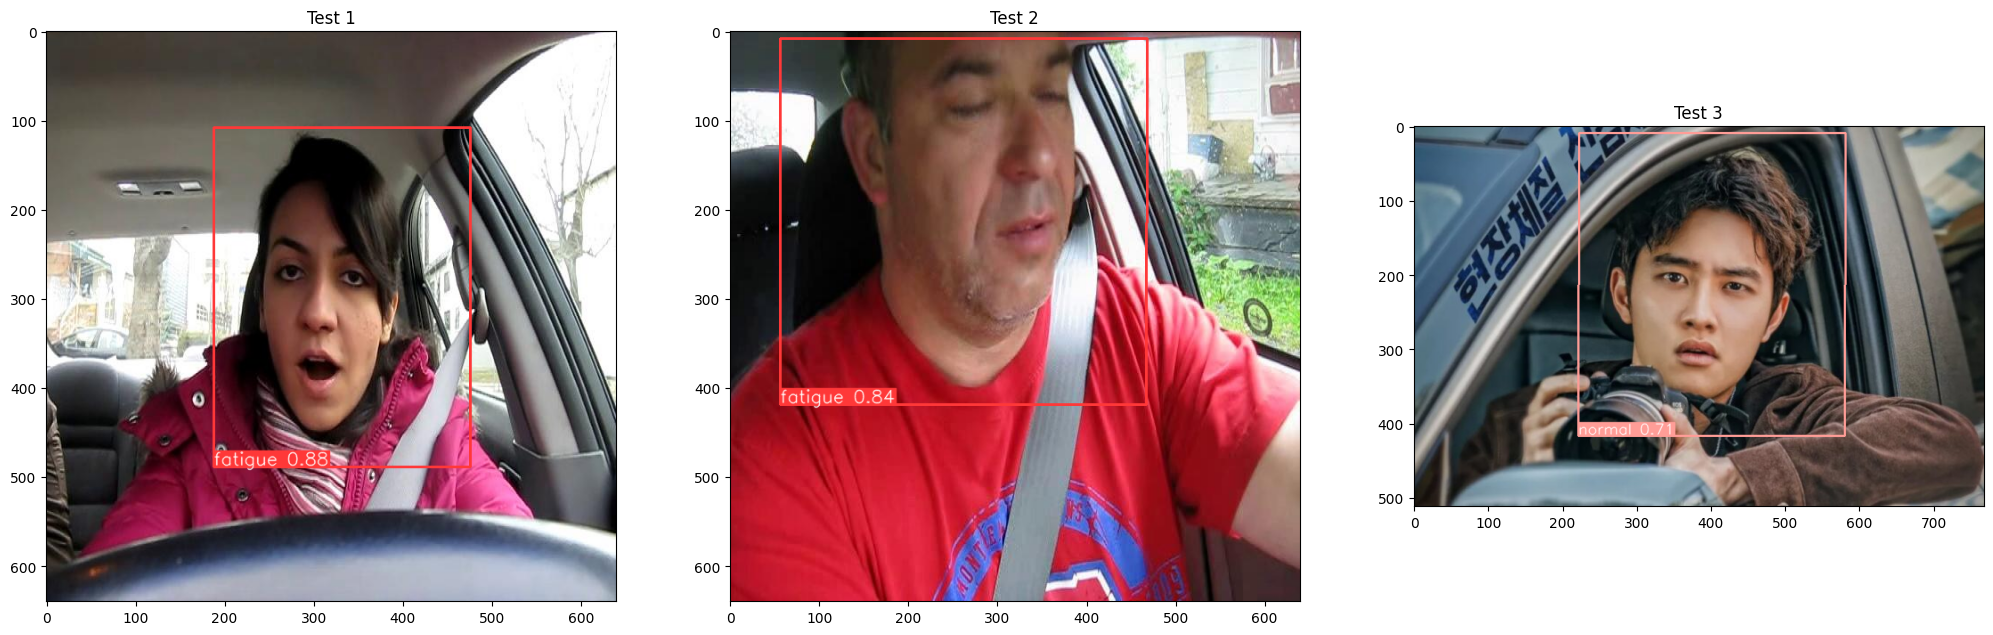

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))

ax1.imshow(Image.fromarray(results[0].plot()[...,::-1]))
ax1.set_title("Test 1")

ax2.imshow(Image.fromarray(results[1].plot()[...,::-1]))
ax2.set_title("Test 2")

ax3.imshow(Image.fromarray(results[2].plot()[...,::-1]))
ax3.set_title("Test 3")